In [1]:
#import all necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling data
from sklearn.preprocessing import scale

# For performing KMeans clustering 
from sklearn.cluster import KMeans

# For performing Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#Setting of proper views of rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

## Data Checks

In [2]:
data = pd.read_csv(r'Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
#Converting exports,imports and health spending percentages to absolute values.
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [5]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#Checking Null counts
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No null value found so imputing of data not needed.

## Finding the coorelation between the variables.

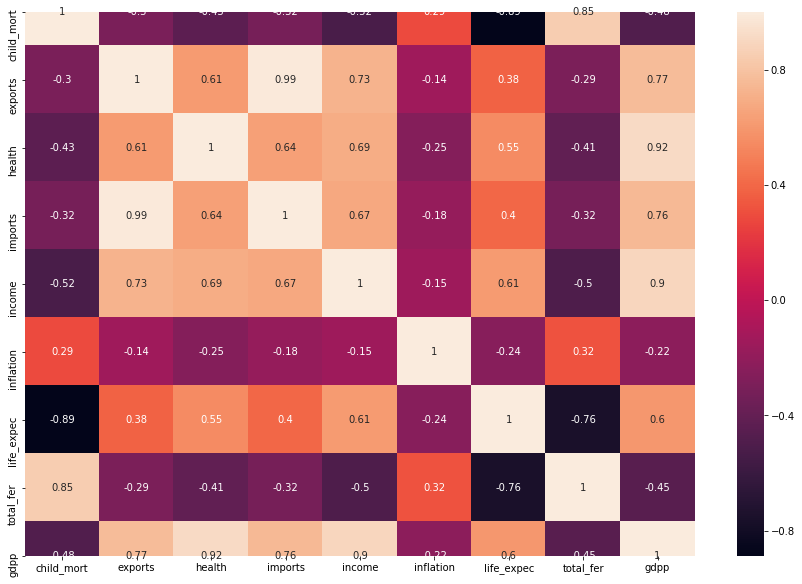

In [9]:
#Plotting correlation matrix to find the correlation between variables.
plt.figure(figsize = (15,10))        
sns.heatmap(data.corr(),annot = True)

***From above correlation matrix we found high correlation between variables.Hence, using PCA for further analysis is a good step.***

## Let's begin with analysis part

## 1.Principal component analysis

In [10]:
#Let's preserve the ID column to some variable, so that we can make use of it later after performing PCA:
country = data['country']

In [11]:
# Now let's drop the country column as it is not a predictor in our data:
data1=data.drop(['country'],axis=1)
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [12]:
data1.shape

(167, 9)

In [13]:
#Re-scaling data as some variables are of different orders of magnitude, so that PCA can be applied.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data2 = standard_scaler.fit_transform(data1)

In [14]:
# checking maximum value here
data2.max()

9.839814177922182

In [15]:
#Importing the PCA module
from sklearn.decomposition import PCA
#Will perform PCA on the data and use svd_solver as randomized and random_state as 42:
pca = PCA(svd_solver='randomized', random_state=42)

In [16]:
#Performing the PCA
pca.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
#Component's of the vector obtained from pca.components_
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

***List of the components would be same as the number of Features in the data.***

In [18]:
#checking the variance explained
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [19]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

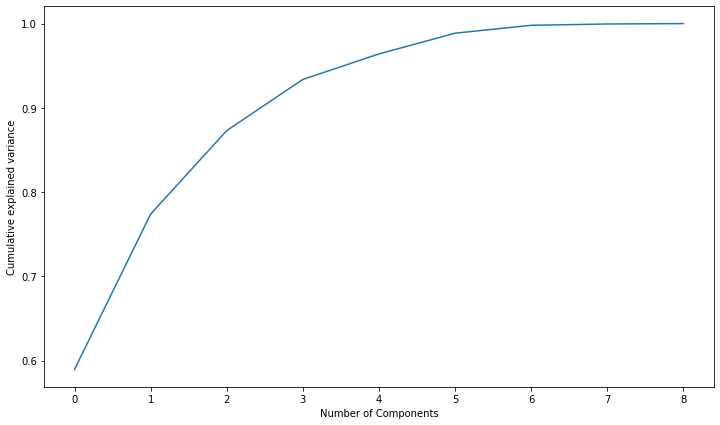

In [20]:
#Plotting the scree plot
fig = plt.figure(figsize = (12,7))
plt.plot(var_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.show()


***Based on the scree plot we can go with the 3 principal component as it is contributing to the 90% of the variance.***

### Running the PCA with the components choosed above:

In [21]:
#Now going ahead and doing dimentionality reduction:
#checking the three components:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [22]:
#Transform the data:
df_pca=pca_final.fit_transform(data2)
df_pca.shape

(167, 3)

In [23]:
#Printing the resultant PCs :
df_pca[ : 20]

array([[-2.63744157,  1.46903797, -0.54135911],
       [-0.02227696, -1.43189586, -0.02070095],
       [-0.45762626, -0.67330094,  0.96186728],
       [-2.7245203 ,  2.17458267,  0.60668655],
       [ 0.64984852, -1.02437392, -0.25010285],
       [ 0.03719686, -0.68088909,  1.46696276],
       [-0.33269152, -1.27451685,  0.17663611],
       [ 3.18036154, -0.25078488, -0.11687726],
       [ 3.81568156,  0.2560835 , -0.27049529],
       [-0.46751515, -0.49349236,  0.60328803],
       [ 1.49875246, -0.4289074 , -0.55023757],
       [ 1.47097104, -0.32679569,  0.42841177],
       [-1.01419903, -0.71180776, -0.11698855],
       [ 0.84523812, -1.00860625, -0.41726161],
       [-0.01344739, -0.98218615,  0.88091302],
       [ 3.9608777 ,  0.83874084, -0.2940772 ],
       [-0.40270707, -0.92181619, -0.50489236],
       [-2.36598657,  1.16845951, -1.23525716],
       [-0.71499819, -0.76810704, -0.13410913],
       [-1.01778054, -0.42614439,  0.05164657]])

In [24]:
#Creating a transpose so that the each column is properly arranged:
pc = np.transpose(df_pca)

In [25]:
#Create a dataframe with the obtained PCs:
pca_df2=pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

In [26]:
pca_df2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


In [27]:
#Let's add back the Country column back to the given Principal components:
pca_df2=pd.DataFrame({'country':list(country),'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pca_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [28]:
pca_df2.shape

(167, 4)

## Now Performing Outlier treatment:

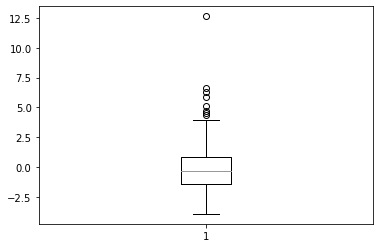

In [29]:
#Outlier analysis before proceeding to clustering as clustering is a distance based algorithm:
#Using IQR method
#For PC1
plt.boxplot(pca_df2.PC1)
Q1 = pca_df2.PC1.quantile(0.05)
Q3 = pca_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC1 >= Q1) & (pca_df2.PC1 <= Q3)]

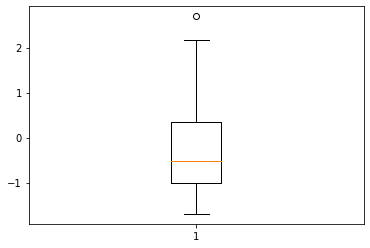

In [30]:
#For PC2
plt.boxplot(pca_df2.PC2)
Q1 = pca_df2.PC2.quantile(0.05)
Q3 = pca_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC2 >= Q1) & (pca_df2.PC2 <= Q3)]

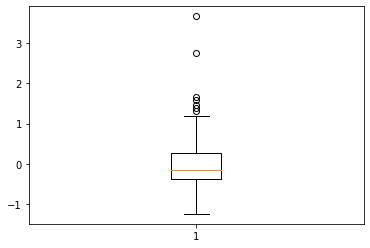

In [31]:
#For PC3
plt.boxplot(pca_df2.PC3)
Q1 = pca_df2.PC3.quantile(0.05)
Q3 = pca_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC3 >= Q1) & (pca_df2.PC3 <= Q3)]

In [32]:
#Outlier analysis is now done.Let's check the data again.
pca_df2.shape

(119, 4)

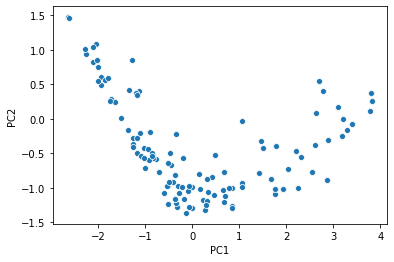

In [33]:
#let's check the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=pca_df2)

### Clustering:

In [34]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
#Let's check the Hopkins measure
#To check the correct Hopkin's score droping the Country column again.
hopkins(pca_df2.drop(['country'],axis=1))

0.8014256383700337

***Hence this is a good Hopkins score. Hence the data is suitable for clustering.***

In [36]:
#Now for performing clustering , we need to again drop the Country column:
dat3_1=pca_df2.drop('country',axis=1)

In [37]:
dat3_1.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
2,-0.457626,-0.673301,0.961867
4,0.649849,-1.024374,-0.250103
6,-0.332692,-1.274517,0.176636
7,3.180362,-0.250785,-0.116877


## K-Mean Clustering

In [ ]:
#Preliminary check is now done.
# We can do standardisation again or else we can skip this step as well.
# dat3_1 = standard_scaler.fit_transform(dat3_1)

In [38]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    ss.append([k, silhouette_score(dat3_1, kmeans.labels_)])

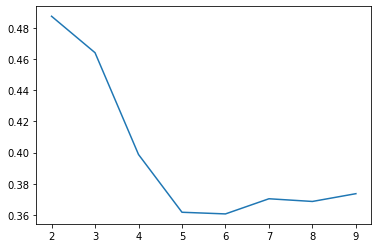

In [39]:
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

***The sihouette score reaches a peak at around 2 and 3 clusters indicating that it might be the ideal number of clusters.***

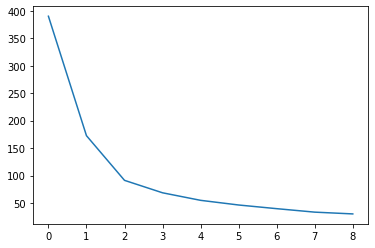

In [40]:
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter=50).fit(dat3_1)
    
    ssd.append(model.inertia_)

plt.plot(ssd)

***A distinct elbow is formed at around 3-7 clusters. Let's finally create the clusters at K-means with k=3 clusters.***

In [41]:
#Lets perform K means using k=3
model_clus4 = KMeans(n_clusters = 3, max_iter=50,random_state=50)
model_clus4.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [42]:
#Let's add the cluster Ids to the PC datas:
dat_km = pd.concat([pca_df2.reset_index().drop('index',axis=1), pd.Series(model_clus4.labels_)], axis=1)
dat_km.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,0


In [43]:
#Checking the count of the observation per clusters
dat_km['ClusterID'].value_counts()

1    61
2    31
0    27
Name: ClusterID, dtype: int64

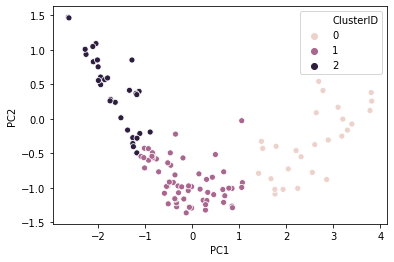

In [44]:
#Ploting the cluster with respect to the clusters obtained:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

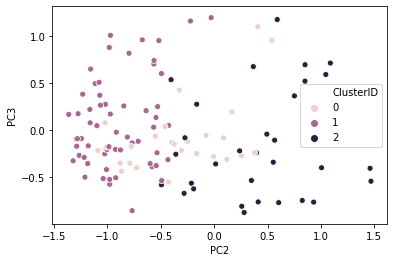

In [45]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=dat_km)

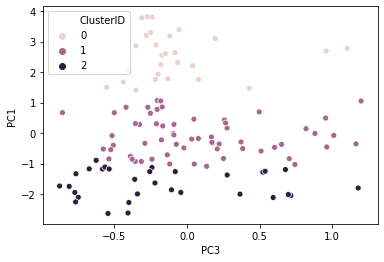

In [46]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=dat_km)

## Cluster Profiling

In [47]:
#Lets merge the original data with the data(ClusterID):
dat5=pd.merge(data,dat_km, how='inner', on='country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.332692,-1.274517,0.176636,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.180362,-0.250785,-0.116877,0


In [48]:
#Lets drop PCs from the data:
dat5.drop(['PC1','PC2','PC3'],axis=1,inplace=True)

In [49]:
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,0


***We have performed the clustering using PCs and have now allocated the ClusterID back to each of the datapoints.***

## Analysis of the clusters:

In [50]:
#Lets profile the clusters by taking the mean of the various attributes:
clu_chi = 	pd.DataFrame(dat5.groupby(["ClusterID"]).child_mort.mean())
clu_exp= 	pd.DataFrame(dat5.groupby(["ClusterID"]).exports.mean())
clu_imp = 	pd.DataFrame(dat5.groupby(["ClusterID"]).imports.mean())
clu_hea = 	pd.DataFrame(dat5.groupby(["ClusterID"]).health.mean())
clu_inc = 	pd.DataFrame(dat5.groupby(["ClusterID"]).income.mean())
clu_inf = 	pd.DataFrame(dat5.groupby(["ClusterID"]).inflation.mean())         
clu_lif = 	pd.DataFrame(dat5.groupby(["ClusterID"]).life_expec.mean())
clu_tot = 	pd.DataFrame(dat5.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat5.groupby(["ClusterID"]).gdpp.mean())

In [52]:
#Lets concat the resultant with the cluster id columns:
df = pd.concat([pd.Series([0,1,2]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
df.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,5.322222,14504.025926,13650.455556,3249.133704,37170.370370,2.204556,79.777778,1.749259,34696.296296
1,1,20.221311,3071.619836,3160.474656,406.979256,12796.557377,6.627721,73.208197,2.272295,6636.360656
2,2,63.651613,861.023623,858.977519,128.778690,4450.000000,9.736452,63.329032,4.111935,2072.161290


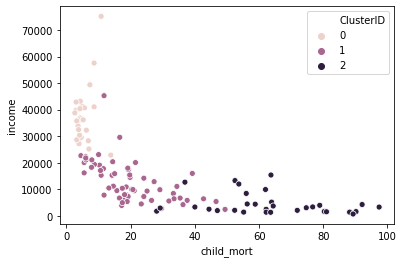

In [53]:
#Plotting child-mortality and income
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=dat5)

In [54]:
#let's take a look at those countries based on clusters 
dat5[dat5['ClusterID']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
4,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,0
5,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,0
7,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,0
8,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,0
19,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,0
27,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,0
28,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,0
36,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,0
37,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,0
41,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,0


In [55]:
dat5[dat5['ClusterID']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,1
6,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,1
9,Bangladesh,49.4,121.28,26.6816,165.244,2440,7.140,70.4,2.33,758,1
10,Barbados,14.2,6320.00,1275.2000,7792.000,15300,0.321,76.7,1.78,16000,1
11,Belarus,5.5,3099.42,338.2830,3889.350,16200,15.100,70.4,1.49,6030,1
12,Belize,18.8,2525.88,225.6800,2495.500,7880,1.140,71.4,2.71,4340,1
13,Bhutan,42.7,926.50,113.3600,1541.260,6420,5.990,72.1,2.38,2180,1
14,Bolivia,46.6,815.76,95.8320,679.140,5410,8.780,71.6,3.20,1980,1


In [56]:
dat5[dat5['ClusterID']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.44,56.2,5.82,553,2
15,Botswana,52.5,2768.60000,527.0500,3257.550000,13300,8.92,57.1,2.88,6350,2
18,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.12,66.1,2.88,786,2
24,Comoros,88.2,126.88500,34.6819,397.573000,1410,3.87,65.9,4.75,769,2
25,"Congo, Rep.",63.9,2331.74000,67.4040,1498.780000,5190,20.70,60.4,4.95,2740,2
33,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482,2
38,Gabon,63.7,5048.75000,306.2500,1653.750000,15400,16.60,62.9,4.08,8750,2
39,Gambia,80.3,133.75600,31.9778,239.974000,1660,4.30,65.5,5.71,562,2
42,Ghana,74.7,386.45000,68.3820,601.290000,3060,16.60,62.2,4.27,1310,2
49,India,58.8,305.10000,54.6750,365.850000,4410,8.98,66.2,2.60,1350,2


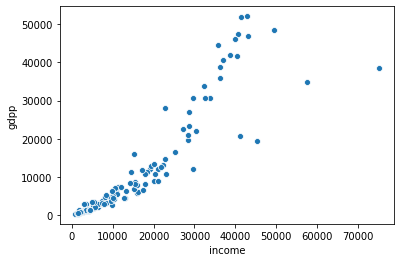

In [57]:
#Plotting Income and gdpp
sns.scatterplot(x='income',y='gdpp',data=dat5)

In [58]:
df

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,5.322222,14504.025926,13650.455556,3249.133704,37170.370370,2.204556,79.777778,1.749259,34696.296296
1,1,20.221311,3071.619836,3160.474656,406.979256,12796.557377,6.627721,73.208197,2.272295,6636.360656
2,2,63.651613,861.023623,858.977519,128.778690,4450.000000,9.736452,63.329032,4.111935,2072.161290


In [73]:
dat5[dat5['ClusterID']==2].sort_values(['child_mort','income','gdpp',],ascending=[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
71,Mauritania,97.4,608.400,52.9200,734.400,3320,18.90,68.2,4.98,1200,2
81,Pakistan,92.1,140.400,22.8800,201.760,4280,10.90,65.3,3.85,1040,2
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,2
64,Liberia,89.3,62.457,38.5860,302.802,700,5.47,60.8,5.02,327,2
24,Comoros,88.2,126.885,34.6819,397.573,1410,3.87,65.9,4.75,769,2
109,Uganda,81.0,101.745,53.6095,170.170,1540,10.60,56.8,6.15,595,2
39,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,2
62,Lao,78.9,403.560,50.9580,562.020,3980,9.20,63.8,3.15,1140,2
100,Sudan,76.7,291.560,93.5360,254.560,3370,19.60,66.3,4.88,1480,2
42,Ghana,74.7,386.450,68.3820,601.290,3060,16.60,62.2,4.27,1310,2


**After analysis we found the clusters and observed that cluster 2 have low values. Hence above are the 10 countries that we need to focus.**

## Hierarchical Clustering

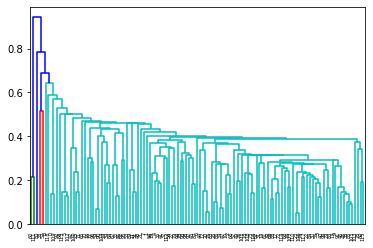

In [62]:
#Using the single linkage procedure.
mergings = linkage(dat3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

**The Single linkage output doesnot seems to be good.Hence using complete Linakge.**

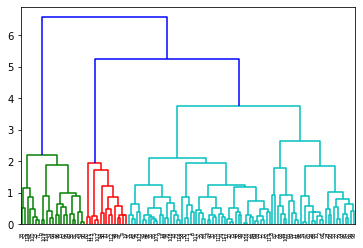

In [63]:
#Using complete linkage method
mergings = linkage(dat3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [75]:
#Okay now we are seeing some good clusters here.
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
dat3_hc = pd.concat([pca_df2, clusterCut], axis=1)
dat3_hc.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
dat3_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0.0
1,NaN,NaN,NaN,NaN,1.0
2,Algeria,-0.457626,-0.673301,0.961867,1.0
3,NaN,NaN,NaN,NaN,1.0
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2.0


In [67]:
dat7=pd.merge(data,dat3_hc,on='country')
dat8=dat7[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
dat8.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0.0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1.0
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,2.0
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,1.0
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,1.0


In [68]:
dat8['ClusterID'].value_counts()

1.0    56
0.0    17
2.0    11
Name: ClusterID, dtype: int64

In [69]:
dat8[dat8['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.000,7185.800,735.6600,19100,1.440,76.8,2.13,12200,2.0
14,Bolivia,46.6,815.760,679.140,95.8320,5410,8.780,71.6,3.20,1980,2.0
24,Comoros,88.2,126.885,397.573,34.6819,1410,3.870,65.9,4.75,769,2.0
26,Croatia,5.5,5076.000,5143.500,1047.6000,20100,0.821,76.3,1.55,13500,2.0
32,El Salvador,19.2,804.310,1393.340,206.6090,7300,2.650,74.1,2.27,2990,2.0
37,France,4.2,10880.800,11408.600,4831.4000,36900,1.050,81.4,2.03,40600,2.0
39,Gambia,80.3,133.756,239.974,31.9778,1660,4.300,65.5,5.71,562,2.0
43,Greece,3.9,5944.900,8258.300,2770.7000,28700,0.673,80.4,1.48,26900,2.0
50,Indonesia,33.3,755.730,696.640,81.1710,8430,15.300,69.9,2.48,3110,2.0
74,Moldova,17.2,638.960,1279.550,190.7100,3910,11.100,69.7,1.27,1630,2.0


In [71]:
dat8[dat8['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0.0
17,Bulgaria,10.8,3433.6800,3625.200,469.9080,15300,1.11,73.9,1.57,6840,0.0
21,Chile,8.7,4863.3000,4037.700,1026.8400,19400,8.96,79.1,1.88,12900,0.0
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,0.0
27,Cyprus,3.6,15461.6000,17710.000,1838.7600,33900,2.01,79.9,1.42,30800,0.0
35,Fiji,24.1,2109.7000,2332.350,177.3900,7350,4.23,65.3,2.67,3650,0.0
42,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,0.0
45,Guatemala,35.4,730.1400,1027.290,193.8550,6710,5.14,71.3,3.38,2830,0.0
47,Hungary,6.0,10715.8000,10021.500,960.2300,22300,2.33,74.5,1.25,13100,0.0
51,Iran,19.3,1593.3200,1266.820,365.6800,17400,15.90,74.5,1.76,6530,0.0


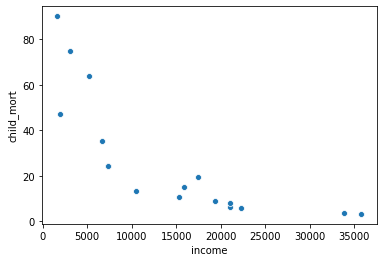

In [72]:
#Let's visualise the clusters here. 
datp=dat8[dat8['ClusterID']==0]
sns.scatterplot(x='income',y='child_mort',data=datp)

Final result : We use the clusters formed during K-means clustering to find
the countries that we require since Hierarchical clustering is not 
showing proper clusters here. For K-means part, we got Cluster 2 might be the one which has a proper need of aid.

Note 1
In this solution K-means and Hierarchical don't produce identical insights.
This would depend on the way the principal components and the final number of clusters are chosen.
It would be perfectly fine if both provide identical insights in any other case

Note 2
For outliers that we removed before clustering took place, you can take any approach to include them in the final list 
of countries that you'd focus on. 
Either reassign them to the clusters that were formed and see if Cluster 2 have any more countries. 
Or use one variable from some of the main indicators to bin the entire 167 countries. 
Like if you take GDPP, keep the bin limits as 0-1700, 1700-3200,3200-6000,6000-13000 and >13000. 
The bin limits are decided on the basis of the approximate gdpp means that we got for the 3 clusters. 
Categorise all the countries from the original dataset within these limits and then take
all the countries less than 1700 as the cutoff.Similarly, proceed for the 2nd variable.
Any other logically thought out approach also works.